# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm 

In [164]:
import sys
import pandas as pd
from agents.agent import DDGP
from new_task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DDGP(task)
best_score = -1000
best_x = 0
best_y = 0
best_z = 0
data = {}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        if score > best_score:
            best_x = task.sim.pose[0]
            best_y = task.sim.pose[1]
            best_z = task.sim.pose[2]
        best_score = max(score, best_score)
        data[i_episode] = {'Episode': i_episode, 'Reward':score,'Action':action,'Best_Score':best_score,
                            'Position_x':task.sim.pose[0],'Position_y':task.sim.pose[1],'Position_z':task.sim.pose[2]}
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), last_position = ({:5.1f},{:5.1f},{:5.1f}), best_position = ({:5.1f},{:5.1f},{:5.1f})".format(
                i_episode, score, best_score, task.sim.pose[0], task.sim.pose[1], task.sim.pose[2], best_x, best_y, best_z), end="")
            break
    sys.stdout.flush()


Episode = 1000, score =  93.819 (best =  94.335), last_position = (-66.6, 12.8,115.6), best_position = ( -2.1, -1.6,138.3))

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [165]:
#I saved the data to use later
data = pd.DataFrame.from_dict(data=data, orient='index')
data.to_csv('data_27082018',index=False)

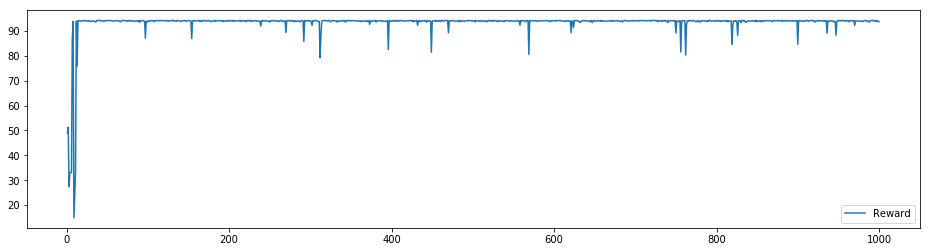

In [166]:
## TODO: Plot the rewards.
plt.figure(figsize=(16,4))
plt.plot(data['Episode'], data['Reward'])
plt.legend()